In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path="/content/prabhas.jpg"

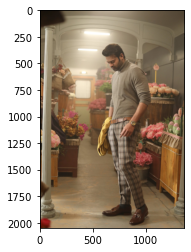

In [3]:
img=plt.imread(path)
plt.imshow(img)

In [4]:
def readfile(filename):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

In [5]:
def edge(img, line_size, blur_amt):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

    # Smooting noisy image using medianBlur
    gray_blur = cv2.medianBlur(gray, blur_amt)

    # Now detecting edges using adaptiveThreshold
    edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_amt)

    return edges

In [6]:
def color_segmentation(img, k_value, epochs, accuracy):  # k_value is number of clusters    
    data = np.float32(img)
    data = data.reshape((-1, 3))
    
    # specifying stopping criteria
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, epochs, accuracy)

    compactness, labels, centers = cv2.kmeans(data, k_value, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)

    result = centers[labels.flatten()]

    # reshaping image to its actual shape
    result = result.reshape(img.shape)
    return result

In [7]:
def cartoonify(path, LINE_SIZE, BLUR_VALUE, TOTAL_COLORS, EPOCHS, ACCURACY):
    img = readfile(path)

    edgeimg = edge(img, LINE_SIZE, BLUR_VALUE)
    segmented_img = color_segmentation(img, TOTAL_COLORS, EPOCHS, ACCURACY)
    
    blur_img = cv2.bilateralFilter(segmented_img, d=7, sigmaColor=200, sigmaSpace=200)    
    cartoon_img = cv2.bitwise_and(blur_img, blur_img, mask = edgeimg)    
    
    return cartoon_img

In [8]:
LINE_SIZE  = 7
BLUR_VALUE = 5
TOTAL_COLORS = 4
EPOCHS = 50
ACCURACY = 0.02

In [9]:
%%time
cartoonified_img=cartoonify(path, LINE_SIZE, BLUR_VALUE, TOTAL_COLORS, EPOCHS, ACCURACY)

CPU times: user 43.8 s, sys: 227 ms, total: 44 s
Wall time: 24.4 s


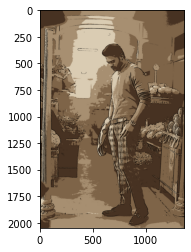

In [10]:
plt.imshow(cartoonified_img)
plt.show()

Text(0.5, 1.0, 'Cartoonified image image')

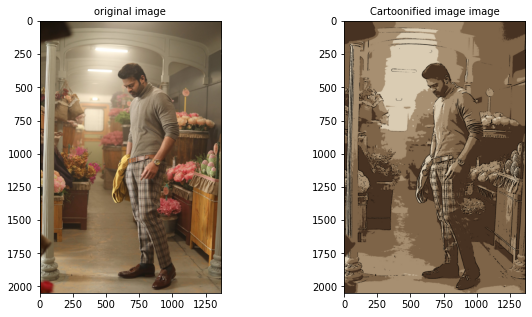

In [11]:
fig, (ax1,ax2)=plt.subplots(1, 2, figsize=(10,5))
ax1.imshow(img)
ax1.set_title("original image", size=10)

ax2.imshow(cartoonified_img)
ax2.set_title("Cartoonified image image", size=10)